In [1]:
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
data1 = pd.read_excel('StrawberryOrganizedScaled.xlsx')
target = pd.read_excel('Strawberry_Target_AL.xlsx')
x_train= data1.iloc [:22, :]
y_train= target.iloc [:22, :5]
x_test = data1.iloc [22 :, :]
y_test = target.iloc [22 :, :5]
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
x_test = torch.tensor(x_test.values).float()
y_test = torch.tensor(y_test.values).float()
trainset = torch.utils.data.TensorDataset(x_train, y_train)
testset = torch.utils.data.TensorDataset(x_test, y_test)

In [3]:
from torch.utils.data import DataLoader
batch_size = 1
trainloader = DataLoader(trainset, batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size, shuffle=False)

In [4]:
import torch.nn as nn
import torch.nn.functional as F
net = nn.Linear(13, 5, bias=False)
weights = torch.tensor([[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
net.weight = nn.Parameter(weights, requires_grad=True)
net.weight

Parameter containing:
tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000, 0.1000, 0.1000, 0.1000]], requires_grad=True)

In [5]:
loss_fn = F.mse_loss
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
loss_train = []
loss_test = []

for epoch in range(100): 
    
    net.train()
    train_loss_sum = 0.0
    for xb,yb in trainloader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        pred = net(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss_sum += loss.item()
    train_loss_sum = train_loss_sum/22
    loss_train.append(train_loss_sum)
    print(f'epoch {epoch + 1}  trainlosssum: {train_loss_sum:.3f}')
        
        
    net.eval()
    testing_loss = 0.0
    testing_loss_sum = 0.0
    for xb,yb in testloader:
        optimizer.zero_grad()
        pred = net(xb)
        loss = loss_fn(pred, yb)
        testing_loss_sum += loss.item()
    testing_loss_sum = testing_loss_sum/5
    loss_test.append(testing_loss_sum)
    print(f'epoch {epoch + 1}  testinglosssum: {testing_loss_sum:.3f}')
print('Finished Training')

C:\Users\shenyutao\AppData\Local\Temp\ipykernel_24952\162199295.py:16: UserWarning: Using a target size (torch.Size([1, 5])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(pred, yb)
C:\Users\shenyutao\AppData\Local\Temp\ipykernel_24952\162199295.py:33: UserWarning: Using a target size (torch.Size([1, 5])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(pred, yb)


epoch 1  trainlosssum: 0.028
epoch 1  testinglosssum: 0.040
epoch 2  trainlosssum: 0.023
epoch 2  testinglosssum: 0.029
epoch 3  trainlosssum: 0.020
epoch 3  testinglosssum: 0.021
epoch 4  trainlosssum: 0.017
epoch 4  testinglosssum: 0.015
epoch 5  trainlosssum: 0.015
epoch 5  testinglosssum: 0.011
epoch 6  trainlosssum: 0.014
epoch 6  testinglosssum: 0.008
epoch 7  trainlosssum: 0.013
epoch 7  testinglosssum: 0.006
epoch 8  trainlosssum: 0.012
epoch 8  testinglosssum: 0.004
epoch 9  trainlosssum: 0.011
epoch 9  testinglosssum: 0.003
epoch 10  trainlosssum: 0.010
epoch 10  testinglosssum: 0.003
epoch 11  trainlosssum: 0.010
epoch 11  testinglosssum: 0.002
epoch 12  trainlosssum: 0.009
epoch 12  testinglosssum: 0.002
epoch 13  trainlosssum: 0.009
epoch 13  testinglosssum: 0.002
epoch 14  trainlosssum: 0.009
epoch 14  testinglosssum: 0.002
epoch 15  trainlosssum: 0.009
epoch 15  testinglosssum: 0.002
epoch 16  trainlosssum: 0.009
epoch 16  testinglosssum: 0.002
epoch 17  trainlosssum: 0.

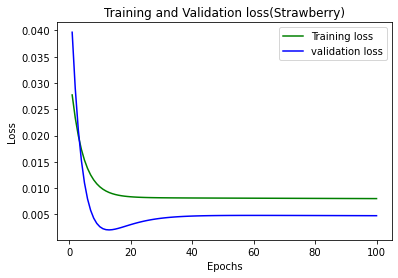

In [6]:
import matplotlib.pyplot as plt 
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss(Strawberry)')
plt.plot(epochs, loss_test, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
net.weight.grad

Parameter containing:
tensor([[0.0803, 0.0757, 0.0660, 0.0660, 0.0660, 0.0823, 0.0857, 0.0839, 0.0758,
         0.0732, 0.0901, 0.0777, 0.0750]], requires_grad=True)